    Nama   : Ryan Rizky Fathinanto
    Email  : ryanrizkyf@gmail.com
    No. HP : 085692475682

In [1]:
import pandas as pd

df = pd.read_csv('/content/bbc-news-data.csv', sep='\t')
df = df.drop(columns=['filename', 'title'])

In [2]:
df.head()

,category,content
0,business,Quarterly profits at US media giant TimeWarne...
1,business,The dollar has hit its highest level against ...
2,business,The owners of embattled Russian oil giant Yuk...
3,business,British Airways has blamed high fuel prices f...
4,business,Shares in UK drinks and food firm Allied Dome...


In [3]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,content,business,entertainment,politics,sport,tech
0,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,The dollar has hit its highest level against ...,1,0,0,0,0
2,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...
2220,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,Computer users across the world continue to i...,0,0,0,0,1
2222,A new European directive could put software w...,0,0,0,0,1
2223,The man making sure US computer networks are ...,0,0,0,0,1


In [4]:
content = df_baru['content'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [5]:
from sklearn.model_selection import train_test_split

content_train, content_test, label_train, label_test = train_test_split(content, label, test_size=0.2)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(content_train) 
tokenizer.fit_on_texts(content_test)
 
sequence_train = tokenizer.texts_to_sequences(content_train)
sequence_test = tokenizer.texts_to_sequences(content_test)
 
padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nVal Akurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [9]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [10]:
num_epochs = 50
hist = model.fit(padded_train, 
                    label_train, 
                    epochs=num_epochs, 
                    validation_data=(padded_test, label_test), 
                    verbose=2,
                    callbacks=[callbacks, checkpoint],
                    batch_size=128)

Epoch 1/50
14/14 - 11s - loss: 1.6070 - accuracy: 0.2298 - val_loss: 1.6019 - val_accuracy: 0.2247
Epoch 2/50
14/14 - 7s - loss: 1.5977 - accuracy: 0.2388 - val_loss: 1.5948 - val_accuracy: 0.2247
Epoch 3/50
14/14 - 7s - loss: 1.6247 - accuracy: 0.2556 - val_loss: 1.5755 - val_accuracy: 0.3506
Epoch 4/50
14/14 - 7s - loss: 1.5479 - accuracy: 0.3213 - val_loss: 1.5309 - val_accuracy: 0.3618
Epoch 5/50
14/14 - 7s - loss: 1.3388 - accuracy: 0.3888 - val_loss: 1.5883 - val_accuracy: 0.3056
Epoch 6/50
14/14 - 7s - loss: 1.1953 - accuracy: 0.4500 - val_loss: 1.1114 - val_accuracy: 0.5551
Epoch 7/50
14/14 - 7s - loss: 1.0013 - accuracy: 0.4635 - val_loss: 1.1581 - val_accuracy: 0.5416
Epoch 8/50
14/14 - 7s - loss: 0.9380 - accuracy: 0.5506 - val_loss: 0.9706 - val_accuracy: 0.5708
Epoch 9/50
14/14 - 7s - loss: 0.7742 - accuracy: 0.6534 - val_loss: 0.9010 - val_accuracy: 0.6022
Epoch 10/50
14/14 - 7s - loss: 0.6404 - accuracy: 0.7236 - val_loss: 0.8296 - val_accuracy: 0.7079
Epoch 11/50
14/14 

In [11]:
import matplotlib.pyplot as plt

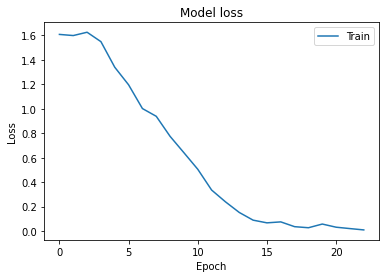

In [12]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

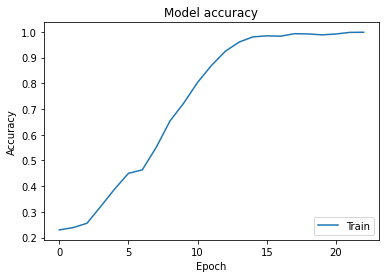

In [13]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()